<a href="https://colab.research.google.com/github/KaanTurk/Image-Processing-/blob/main/FinalSubmission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

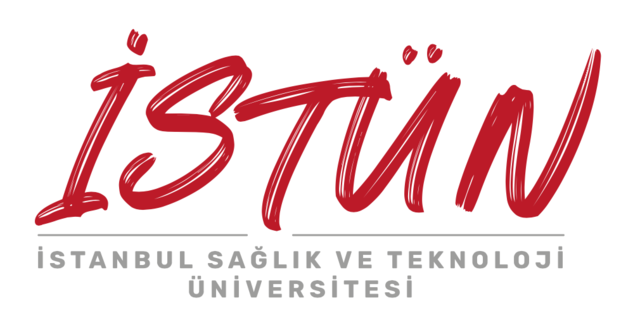



## Kaan TÜRK 220611028

## Tuna BAHADIR 220610018

**Overview:**

Counterfeit drugs pose a global health threat. These counterfeit drugs can lead to patients receiving incorrect diagnosis and treatment, antibiotic resistance, and even death. Detecting counterfeit drugs is crucial for protecting public health.

**Current Problems:**



*   Manual barcode verification: The traditional method of detecting counterfeit drugs is manual barcode verification by pharmacists. This method is time-consuming, prone to errors, and difficult to implement on a large scale.
*   Lack of a database: There is a lack of a central database containing information about counterfeit drugs. This makes it difficult to detect and track counterfeit drugs.
*   Easily counterfeitable barcodes: Counterfeit drug manufacturers can easily counterfeit original barcodes. This limits the effectiveness of counterfeit drug detection systems based on barcode verification.

**Proposed Solution:**

A barcode comparison solution can help improve counterfeit drug detection by addressing these issues. This solution would consist of the following:


*   Automatic barcode reading: An automatic barcode reader will be able to read the barcodes of drugs quickly and accurately.
*   Central database: A central database containing information about counterfeit drugs will be created. This database will be compared to the barcodes read by the automatic barcode reader.
*   Advanced barcode verification algorithms: Advanced barcode verification algorithms will be developed to distinguish original barcodes from counterfeit ones.

**Benefits:**


*   Improved efficiency: Counterfeit drug detection will be faster and more efficient with the use of automatic barcode reading and a central database.
*   Increased accuracy: Counterfeit drug detection will be more accurate with the use of advanced barcode verification algorithms.
*  Better tracking: A central database will help track the source of counterfeit drugs and apprehend counterfeiters.

**Conclusion:**

A barcode comparison solution is a promising approach that can help improve counterfeit drug detection and protect public health. With automatic barcode reading, a central database, and advanced barcode verification algorithms, this solution can provide an effective tool in the fight against the global threat of counterfeit drugs.











In [ ]:
!pip install opencv-python-headless
!pip install pyzbar
!pip install pillow


In [ ]:
import cv2
from pyzbar.pyzbar import decode


original_barcode_number = '699717010093'


image_path = '/content/photo.jpg'
image = cv2.imread(image_path)


decoded_objects = decode(image)


barcode_number = None
for obj in decoded_objects:
    barcode_number = obj.data.decode('utf-8')
    print("Barcode number: ", barcode_number)
    break


if barcode_number == original_barcode_number:
    print("Original")
else:
    print("Not original")


cv2.imshow("Image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# **EXPLANATİON OF THE CODE**

In [ ]:
import cv2
from pyzbar.pyzbar import decode




* cv2 loads the OpenCV library. OpenCV is a popular library for computer vision and image processing.  
*  pyzbar.pyzbar is a library used to read barcodes and QR codes.



In [ ]:
original_barcode_number = '699717010093'




* This is the original barcode number we want to verify. The code will compare the scanned barcode number with this number.




In [ ]:
image_path = '/content/photo.jpg'
image = cv2.imread(image_path)




* image_path is the file path of the image to be analyzed.
*  cv2.imread(image_path) reads the image and assigns it to the image variable.



In [ ]:
decoded_objects = decode(image)




*   decode(image) decodes the barcodes or QR codes in the image and assigns them to the decoded_objects list.




In [ ]:
barcode_number = None
for obj in decoded_objects:
    barcode_number = obj.data.decode('utf-8')
    print("Barcode number: ", barcode_number)
    break



*   barcode_number is initially set to None.
*   A loop is initiated for each object in the decoded_objects list.
*   obj.data.decode('utf-8') decodes the barcode data in UTF-8 format and assigns it to the barcode_number variable.
*   Prints the first barcode number and breaks the loop.



In [ ]:
if barcode_number == original_barcode_number:
    print("Original")
else:
    print("Not original")




*   Compares the scanned barcode number with the original barcode number.

*   If the scanned number matches the original number, it prints "Original".
*   Otherwise, it prints "Not original".






In [ ]:
cv2.imshow("Image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()




*   cv2.imshow("Image", image) displays the image on the screen.
*   cv2.waitKey(0) waits for the user to press a key.
*   cv2.destroyAllWindows() closes all OpenCV windows.

